In [283]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

Vamos a trabajar con datos que describen el comportamiento de los clientes dentro de un programa de lealtad de una aerolínea:
- Customer Flight Analysis.csv
- Customer Loyalty History.csv

#### ---- INDICE ----  

[. Visualización Inicial](#visualización-inicial)  
[. Análisis Descriptivo](#análisis-descriptivo)  
. Limpieza
- [Valores Duplicados](#valores-duplicados)
- [Valores Nulos](#valores-nulos)  

[. Unión de Datos](#unión-de-datos)  
[. Visualización](#visualización)

#### ------------------

### Visualización Inicial

--> CUSTOMER FLIGHT ACTIVITY

In [284]:
df_cfa = pd.read_csv(r'data\Customer Flight Activity.csv')
display(df_cfa.head(3)) # miramos cómo nos abre el df
display(df_cfa.tail(3))
print('.'*100)
print('Valores aleatorios:')
display(df_cfa.sample(3))

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


....................................................................................................
Valores aleatorios:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
265784,750578,2018,4,0,0,0,0,0.0,0,0
363807,573954,2018,10,4,4,8,2904,290.0,0,0
278687,541163,2018,5,0,0,0,0,0.0,0,0


En este df, tenemos la siguiente información:
- `Loyalty Number`: identificador único para cada cliente dentro del programa de lealtad de la aerolínea. 
- `Year`: año en el cual se registraron las actividades de vuelo para el cliente.
- `Month`: mes del año (de 1 a 12) en el cual ocurrieron las actividades de vuelo.
- `Flights Booked`: número total de vuelos reservados por el cliente en <u>ese mes específico</u>.
- `Flights with Companions`: número de vuelos reservados en los cuales el cliente viajó con acompañantes. 
- `Total Flights`: número total de vuelos que el cliente ha realizado (puede incluir vuelos reservado en meses anteriores).
- `Distance`: distancia total (presumiblemente en millas o kilómetros) que el cliente ha volado <u>durante el mes</u>.
- `Points Accumulated`: puntos acumulados por el cliente en el programa de lealtad <u>durante el mes</u>,
con base en la distancia volada u otros factores.
- `Points Redeemed`: puntos que el cliente ha redimido <u>en el mes</u>, posiblemente para obtener beneficios como vuelos gratis, mejoras, etc.
- `Dollar Cost Points Redeemed`: valor en <u>dólares</u> de los puntos que el cliente ha redimido <u>durante el mes</u>.

In [285]:
# VISUALIZACIÓN INICIAL
df_cfa.info()
print('.'*100)
print(f'--> Tenemos {df_cfa.shape[0]} filas y {df_cfa.shape[1]} columnas.')

# NOTAS:
# parece que no hay ningún nulo en ninguna columna
# SON TODAS NUMÉRICAS, no hay ninguna booleana
# num de clientes => 405624   (se repiten son: 16737 clientes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB
....................................................................................................
--> Tenemos 405624 filas y 10

In [286]:
# Número de ID/Loyalty Number en total:
df_cfa['Loyalty Number'].unique().size

16737

--> CUSTOMER LOYALTY HISTORY

In [287]:
df_clh = pd.read_csv(r'data\Customer Loyalty History.csv')
display(df_clh.head(3)) # miramos cómo nos abre el df
display(df_clh.tail(3))
print('.'*100)
print('Valores aleatorios:')
display(df_clh.sample(3))

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


....................................................................................................
Valores aleatorios:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1213,330316,Canada,Ontario,Toronto,M8Y 4K8,Female,Bachelor,59867.0,Married,Aurora,5479.85,Standard,2014,2,NaN,NaN
380,782523,Canada,Ontario,Toronto,M2P 4F6,Female,Bachelor,56443.0,Married,Star,4547.89,Standard,2018,9,NaN,NaN
4830,502946,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Single,Nova,3164.38,Standard,2018,1,NaN,NaN


En este df tenemos la siguiente información:
- `Loyalty Number`: identificador único del cliente dentro del programa de lealtad.
- `Country`: país de residencia del cliente.
- `Province`: provincia o estado de residencia del cliente (aplicable a países con divisiones provinciales o estatales, como Canadá).
- `City`: ciudad de residencia del cliente.
- `Postal Code`: código postal del cliente.
- `Gender`: género del cliente.
- `Education`: nivel educativo alcanzado por el cliente.
- `Salary`: ingreso anual estimado del cliente.
- `Marital Status`: estado civil del cliente.
- `Loyalty Card`: tipo de tarjeta de lealtad que posee el cliente (distintos niveles o
categorías dentro del programa de lealtad)
- `CLV (Customer Lifetime Value)`: valor total estimado que el cliente aporta a la empresa durante toda la relación que mantiene con ella.
- `Enrollment Type`: tipo de inscripción del cliente en el programa de lealtad.
- `Enrollment Year`: año en que el cliente se inscribió en el programa de lealtad.
- `Enrollment Month`: mes en que el cliente se inscribió en el programa de lealtad.
- `Cancellation Year`: año en que el cliente canceló su membresía en el programa de lealtad, si aplica.
- `Cancellation Month`: mes en que el cliente canceló su membresía en el programa de lealtad, si aplica.

In [288]:
# VISUALIZACIÓN INICIAL
df_clh.info()
print('.'*100)
print(f'--> Tenemos {df_clh.shape[0]} filas y {df_clh.shape[1]} columnas.')

# NOTAS:
# NULOS --> Salary,  Cancellation Year , Cancellation Month 
# Cancellation year // Cancellation month --> a int  (no datetime al estar separados)
# num de clientes (cfa) = 405624    <-->    16737 (están todos: ok)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [289]:
# Para poder convertir las columnas Cancellation Year y Cancellation Month
# de float64 a int64
# Necesitamos NO TENER NULOS --> se hará en la parte de gestión de nulos

### Análisis Descriptivo

--> CUSTOMER FLIGHT ACTIVITY

In [290]:
print("Estadísticas descriptivas para VARIABLES NUMÉRICAS:")
# Loyalty Number / 
display(df_cfa.describe().T)
print("\nEstadísticas descriptivas para VARIABLES CATEGÓRICAS:")
print("--> No tenemos variables categóricas en este df.")

Estadísticas descriptivas para VARIABLES NUMÉRICAS:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0



Estadísticas descriptivas para VARIABLES CATEGÓRICAS:
--> No tenemos variables categóricas en este df.


--> CUSTOMER LOYALTY HISTORY

In [291]:
print("Estadísticas descriptivas para VARIABLES NUMÉRICAS:")
display(df_clh.describe().T)
print("\nEstadísticas descriptivas para VARIABLES CATEGÓRICAS:")
# Country / Province / City / Postal Code / Gender / Education / Martial Status / Loyalty Card / Enrollment Type  --> ok
display(df_clh.describe(include = "object").T)

# Notas:
# ---- numéricas
# Salary --> min valor negativo?¿?
# ---- categóricas
# Country --> todos de CANADA


Estadísticas descriptivas para VARIABLES NUMÉRICAS:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00



Estadísticas descriptivas para VARIABLES CATEGÓRICAS:


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [292]:
# Variables NUMÉRICAS: 
#'Salary' hay valores negativos: 
condicion_negativo = df_clh['Salary'] < 0
df_salary_neg = df_clh[condicion_negativo]
print('Salarios NEGATIVOS:')
display(df_salary_neg.head())
print(f'Tenemos {df_salary_neg.shape[0]} filas con salarios negativos.')

Salarios NEGATIVOS:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1082,542976,Canada,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.50,2018 Promotion,2018,3,NaN,NaN
1894,959977,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
2471,232755,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,NaN,NaN
3575,525245,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,-45962.0,Married,Star,2402.33,2018 Promotion,2018,3,NaN,NaN
3932,603070,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,-19325.0,Single,Star,2893.74,2018 Promotion,2018,3,NaN,NaN


Tenemos 20 filas con salarios negativos.


In [293]:
# Podemos intuir que a la hora de incorporar estos datos, el criterio no quedó claro, 
# por lo que en 20 ocasiones el número se insertó de manera negativa:

# Cambiamos los valores a positivos:
salary_serie = df_clh['Salary']  # serie
salary_list = salary_serie.to_list() # lista
# --> hacemos una list comprehension 
salary_list_bn = [(num *-1) if num <0 else num for num in salary_list]
salary_list_bn[1082]  # --> 49830.0 ok
salary_list_bn[3575]  # --> 45962.0 ok
# de nuevo, pasamos la lista a serie para poder meterla en el df
salary = pd.Series(salary_list_bn) # serie
# eliminamos la columna anterior y 
df_clh['Salary'] = salary

# Comprobamos:
display(df_clh.tail(3))   
condicion_negativo = df_clh['Salary'] < 0
print(f'Filas negativas: {df_clh[condicion_negativo].shape[0]}.')


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


Filas negativas: 0.


In [294]:
# Variables CATEGÓRICAS:
# Hemos visto que la columna 'Country' sólo tiene 1 valor --> Canada
# eliminamos dicha columna
df_clh.drop('Country', axis=1, inplace= True) 
# Comprobamos:
df_clh.select_dtypes(include= 'object').columns

Index(['Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'Enrollment Type'],
      dtype='object')

Valores únicos categóricas

In [295]:
# Observación de los VALORES ÚNICOS en las variables categóricas, junto con sus frecuencias

for col in df_clh.select_dtypes(include="object").columns:
    print(f"--> {col.upper()}")
    conteo = df_clh[col].value_counts(dropna = False)
    print(conteo) # comprobamos que no hay nulos
    print(f'Número de valores únicos: {conteo.reset_index().shape[0]}.')
    print('.'*100)
    
# Notas:
# está todo correcto, todo escrito de forma homogénea

--> PROVINCE
Province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64
Número de valores únicos: 11.
....................................................................................................
--> CITY
City
Toronto           3351
Vancouver         2582
Montreal          2059
Winnipeg           658
Whistler           582
Halifax            518
Ottawa             509
Trenton            486
Edmonton           486
Quebec City        485
Dawson Creek       444
Fredericton        425
Regina             409
Kingston           401
Tremblant          398
Victoria           389
Hull               358
West Vancouver     324
St. John's         258
Thunder Bay        256
Sudbury            227
Monct

### Valores Duplicados

--> CUSTOMER FLIGHT ACTIVITY

In [296]:
print(f'Valores duplicados: {df_cfa.duplicated().sum()}.')
# Tenemos varias entradas duplicadas:
# Vamos a ver cuáles son: definimos una máscara para poder filtrar
print('ENTRADAS DUPLICADAS:')
m_duplicados = df_cfa.duplicated(keep=False) 
display(df_cfa[m_duplicados].sort_values('Loyalty Number').head(11)) # ordenamos por cliente
display(df_cfa[m_duplicados].sort_values('Loyalty Number').tail(11))
# Observamos que TODAS son entradas NO VÁLIDAS: al menos tenemos 11 valores duplicados por cliente

Valores duplicados: 1864.
ENTRADAS DUPLICADAS:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
33843,101902,2017,3,0,0,0,0,0.0,0,0
16942,101902,2017,2,0,0,0,0,0.0,0,0
185952,101902,2017,12,0,0,0,0,0.0,0,0
185953,101902,2017,12,0,0,0,0,0.0,0,0
101447,101902,2017,7,0,0,0,0,0.0,0,0
16943,101902,2017,2,0,0,0,0,0.0,0,0
33844,101902,2017,3,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
101448,101902,2017,7,0,0,0,0,0.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
236441,990512,2018,2,0,0,0,0,0.0,0,0
101268,992168,2017,6,0,0,0,0,0.0,0,0
151972,992168,2017,9,0,0,0,0,0.0,0,0
304081,992168,2018,6,0,0,0,0,0.0,0,0
304080,992168,2018,6,0,0,0,0,0.0,0,0
354783,992168,2018,9,0,0,0,0,0.0,0,0
354784,992168,2018,9,0,0,0,0,0.0,0,0
33665,992168,2017,2,0,0,0,0,0.0,0,0
33664,992168,2017,2,0,0,0,0,0.0,0,0
101269,992168,2017,6,0,0,0,0,0.0,0,0


In [297]:
# Eliminamos todos los valores duplicados:
df_cfa.drop_duplicates(inplace=True)
print(f'Valores duplicados: {df_cfa.duplicated().sum()}.')
print(f'Filas resultantes:{df_cfa.shape[0]}.') # --> ok

Valores duplicados: 0.
Filas resultantes:403760.


--> CUSTOMER LOYALTY HISTORY

In [298]:
df_clh.duplicated().sum()
# Comprobamos que en el df con la infomación de los clientes NO tenemos ningún duplicado

0

### Valores Nulos

--> CUSTOMER FLIGHT ACTIVITY

In [299]:
# Contamos los valores nulos para todo el DataFrame (por columna)
# Comprobamos que en el df no tenemos ningún valor nulo
df_cfa.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

--> CUSTOMER LOYALTY HISTORY

In [300]:
# Contamos los valores nulos para todo el DataFrame (por columna)
print("Número de valores nulos por columna:")
df_clh.isnull().sum() # NULOS --> Salary,  Cancellation Year , Cancellation Month 

Número de valores nulos por columna:


Loyalty Number            0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [301]:
# Vemos los porcentajes en cada columna:
df_nulos = round(df_clh.isnull().sum()/df_clh.shape[0]*100,2).sort_values(ascending=False).reset_index()
df_nulos.rename(columns={'index': 'variable', 0 : '% nulos'}, inplace=True) # renombramos las columnas
m_nulos = df_nulos['% nulos'] > 0
df_nulos = df_nulos[m_nulos] # sobreescribimos el df de nulos con sólo los que los tengan
df_nulos

,variable,% nulos
0,Cancellation Year,87.65
1,Cancellation Month,87.65
2,Salary,25.32


In [302]:
# Observación de los VALORES ÚNICOS en las columnas:
# 'Cancellation Year' y 'Cancellation Month'

col_num_nulos = ['Cancellation Year', 'Cancellation Month']
for col in df_clh[col_num_nulos]:
    conteo = df_clh[col].value_counts(dropna = False)
    print(conteo) # comprobamos que no hay nulos
    print(f'Número de valores únicos: {conteo.reset_index().shape[0]}.')
    print('.'*100)


Cancellation Year
NaN       14670
2018.0      645
2017.0      506
2016.0      427
2015.0      265
2014.0      181
2013.0       43
Name: count, dtype: int64
Número de valores únicos: 7.
....................................................................................................
Cancellation Month
NaN     14670
12.0      213
11.0      212
8.0       208
7.0       186
10.0      180
9.0       176
6.0       165
1.0       155
3.0       149
5.0       148
2.0       139
4.0       136
Name: count, dtype: int64
Número de valores únicos: 13.
....................................................................................................


In [303]:
# Puede deducirse que los clientes que no tengan asignado un valor a estas columnas,
# se debe a que NO HAN CANCELADO su membresía --> reemplazaremos los valores por una nueva categoría
# Categoría => 0 (ya que son numéricas)
# Una vez resueltos los valores nulos, cambiaremos el tipo de dato: de float a int

print("--- Imputando columnas por la categoría '0' ---")
for columna in col_num_nulos:
    df_clh[columna] = df_clh[columna].fillna(0.0) # Rellena los nulos con el float 0.0
    print(f"Columna '{columna}': Nulos reemplazados por '0'.")

# Comprobamos:
print("Número de valores nulos por columna:")
df_clh[col_num_nulos].isnull().sum() 

--- Imputando columnas por la categoría '0' ---
Columna 'Cancellation Year': Nulos reemplazados por '0'.
Columna 'Cancellation Month': Nulos reemplazados por '0'.
Número de valores nulos por columna:


Cancellation Year     0
Cancellation Month    0
dtype: int64

In [304]:
# Una vez hemos imputado los nulos, cambiaremos el tipo de dato que tienen ambas columnas:
df_clh['Cancellation Year'] = df_clh['Cancellation Year'].astype(int)
df_clh['Cancellation Month'] = df_clh['Cancellation Month'].astype(int)
df_clh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Province            16737 non-null  object 
 2   City                16737 non-null  object 
 3   Postal Code         16737 non-null  object 
 4   Gender              16737 non-null  object 
 5   Education           16737 non-null  object 
 6   Salary              12499 non-null  float64
 7   Marital Status      16737 non-null  object 
 8   Loyalty Card        16737 non-null  object 
 9   CLV                 16737 non-null  float64
 10  Enrollment Type     16737 non-null  object 
 11  Enrollment Year     16737 non-null  int64  
 12  Enrollment Month    16737 non-null  int64  
 13  Cancellation Year   16737 non-null  int32  
 14  Cancellation Month  16737 non-null  int32  
dtypes: float64(2), int32(2), int64(3), object(8)
memory u

In [305]:
# La columna 'Salary' tiene 4238 nulos (25.32 %) --> cantidad de valores faltantes MUY GRANDE
# Necesitaremos reemplazar los valores nulos con modelos estadísticos avanzados

# Recuperamos los datos estadísticos que vimos previamente de esta columna
# Datos correctos, sin tener valores negativos
display(df_clh['Salary'].describe().reset_index().T)

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
Salary,12499.0,79359.340907,34749.691464,9081.0,59246.5,73455.0,88517.5,407228.0


In [306]:
# Vemo que el máximo se aleja bastante del resto, comprobamos que no sea un outlier:
condicion_salary = df_clh['Salary'] == 407228.0
df_salary_max = df_clh[condicion_salary]
df_salary_max  # --> 1 registro con ese salario

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
5557,274431,British Columbia,West Vancouver,V6V 8Z3,Female,Doctor,407228.0,Married,Star,7475.78,2018 Promotion,2018,3,0,0


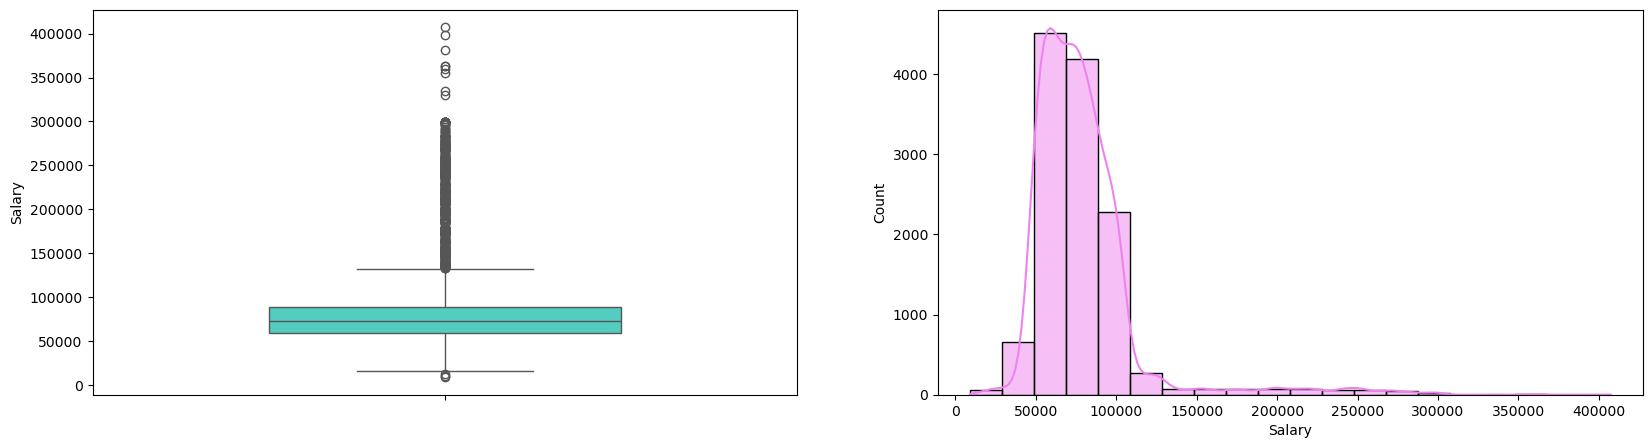

In [307]:
# Graficamos de forma rápida y básica dicha columna, para comrpobar visualmente:
# Utilizaremos un tipo de gráfico BOXPLOT y un HISTOGRAMA, para ver más claramente si son valores atípicos

# Establecemos el "fondo" los dos gráficos:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))  
# Boxplot
sns.boxplot(y = "Salary", 
            data = df_clh, 
            width = 0.5, 
            color = "turquoise",
            ax = axes[0])
# Histograma
sns.histplot(x = "Salary", 
             data = df_clh, 
             color = "violet", 
             kde = True, 
             bins = 20,
             ax = axes[1]);

# Vemos cláramente que hay muchos valores fuera del rango de la mayoría

In [308]:
df_clh['Salary']

0         83236.0
1             NaN
2             NaN
3             NaN
4        103495.0
           ...   
16732         NaN
16733     89210.0
16734         NaN
16735     57297.0
16736     75049.0
Name: Salary, Length: 16737, dtype: float64

In [309]:
# Para comprobar los resultados obtenidos con los métodos estadísticos avanzados, 
# vamos a trabajar con un df con la copia de la columna 'Salary'
salary = df_clh['Salary'].reset_index()
salary.drop('index', axis = 1, inplace=True)
salary.head()

,Salary
0,83236.0
1,NaN
2,NaN
3,NaN
4,103495.0


In [310]:
# IMPUTACIÓN con IterativeImputer
imputer_id = IterativeImputer(max_iter = 20, random_state= 42) # creamos la instancia
salary_imp_id = imputer_id.fit_transform(salary[['Salary']]) # Transformamos los datos (array)

# Insertamos como nueva columna
salary['Salary_id'] = salary_imp_id.round(4)
# Comprobamos
display(salary.head())
print(f'En la columna "Salary_id" enemos {salary['Salary_id'].isnull().sum()} nulos.')

,Salary,Salary_id
0,83236.0,83236.0000
1,NaN,79359.3409
2,NaN,79359.3409
3,NaN,79359.3409
4,103495.0,103495.0000


En la columna "Salary_id" enemos 0 nulos.


In [311]:
# IMPUTACIÓN con KNNImputer
imputer_knn = KNNImputer(n_neighbors = 5) # creamos la instancia
salary_imp_knn = imputer_knn.fit_transform(salary[['Salary']]) # Transformamos los datos (array)

# Insertamos como nueva columna
salary['Salary_knn'] = salary_imp_knn.round(4)
# Comprobamos
display(salary.head())
print(f'En la columna "Salary_knn" enemos {salary['Salary_knn'].isnull().sum()} nulos.')

,Salary,Salary_id,Salary_knn
0,83236.0,83236.0000,83236.0000
1,NaN,79359.3409,79359.3409
2,NaN,79359.3409,79359.3409
3,NaN,79359.3409,79359.3409
4,103495.0,103495.0000,103495.0000


En la columna "Salary_knn" enemos 0 nulos.


In [312]:
# Comparamos ambos métodos, para ver cuál sería más preciso:
salary.describe().T

# Casualmente, los dos métodos nos dan los mismos resultados

,count,mean,std,min,25%,50%,75%,max
Salary,12499.0,79359.340907,34749.691464,9081.0,59246.5,73455.0000,88517.5,407228.0
Salary_id,16737.0,79359.340905,30029.311812,9081.0,63899.0,79359.3409,82940.0,407228.0
Salary_knn,16737.0,79359.340905,30029.311812,9081.0,63899.0,79359.3409,82940.0,407228.0


In [313]:
# --> Imputamos en la columna 'Salary' del df original:
imputer = IterativeImputer(max_iter = 20, random_state= 42) # creamos la instancia
salary_imp = imputer_id.fit_transform(df_clh[['Salary']]) # Transformamos los datos (array)

# Sobreescribimos la columna
df_clh['Salary'] = salary_imp_id.round(1)
# Comprobamos
display(df_clh.tail(3)) # No tenemos ni negativos ni nulos

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16734,776187,British Columbia,Vancouver,V5R 1W3,Male,College,79359.3,Single,Star,74228.52,Standard,2014,3,0,0
16735,906428,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,57297.0,Married,Star,10018.66,2018 Promotion,2018,4,0,0
16736,652627,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016,8


### Unión de Datos

In [314]:
# Hemos trabajado con los datos en df separados,
# tras limpiarlos y transformarlos, los unimos en un solo df:

# Previsualizamos de nuevo los dos df que tenemos
print('CUSTOMER FLIGHT ACTIVITY "df_cfa"')
print(df_cfa.shape)
display(df_cfa.head())

print('CUSTOMER LOYAL HISTORY "df_clh"')
print(df_clh.shape)
display(df_clh.head())

CUSTOMER FLIGHT ACTIVITY "df_cfa"
(403760, 10)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


CUSTOMER LOYAL HISTORY "df_clh"
(16737, 15)


,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0,0
1,549612,Alberta,Edmonton,T3G 6Y6,Male,College,79359.3,Divorced,Star,3839.61,Standard,2016,3,0,0
2,429460,British Columbia,Vancouver,V6E 3D9,Male,College,79359.3,Single,Star,3839.75,Standard,2014,7,2018,1
3,608370,Ontario,Toronto,P1W 1K4,Male,College,79359.3,Single,Star,3839.75,Standard,2013,2,0,0
4,530508,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,0,0


In [315]:
# Observamos que la columna 'Loyalty Numbre' es común en ambos df
# Fusionaremos ambos df por dicha columna:
# El df_clh es donde se recogen los datos de cada cliente,
# por lo que será al df_cfa donde fusionaremos los datos del df_clh
df_customers = df_cfa.merge(df_clh, on='Loyalty Number')

# Previsualizamos el df completo:
print('CUSTOMERS')
print(df_customers.shape)
display(df_customers.head())

CUSTOMERS
(403760, 24)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,79359.3,Single,Nova,2887.74,Standard,2013,3,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,79359.3,Divorced,Nova,2838.07,Standard,2016,7,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,0,0


### Visualización

In [316]:
# Recordamos las columnas que tenemos en nuestro df:
col_diccionario = {'Columnas': list(df_customers.dtypes),
                   'Tipos de Datos': list(df_customers.columns) } 
columnas = pd.DataFrame(col_diccionario)
columnas

,Columnas,Tipos de Datos
0,int64,Loyalty Number
1,int64,Year
2,int64,Month
3,int64,Flights Booked
4,int64,Flights with Companions
5,int64,Total Flights
6,int64,Distance
7,float64,Points Accumulated
8,int64,Points Redeemed
9,int64,Dollar Cost Points Redeemed


#### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [ ]:
# Para obtener esta información necesitamos las columnas:
# Flights Booked --> num total vuelos AL MES
# Year --> registro de las actividades del vuelo de ese cliente, en ese año

# Recuperamos los datos únicos de la columna 'Year', para saber cuántos años tenemos
print(df_customers['Year'].value_counts()) # 2017, 2018

# Definimos dos df por cada año, para facilitar el trabajo
df_2017 = df_customers [df_customers['Year'] == 2017]
df_2018 = df_customers [df_customers['Year'] == 2018]

Year
2018    202022
2017    201738
Name: count, dtype: int64
(201738, 24)
(202022, 24)


In [ ]:
# Vemos cuántas reservas de vuelos tenemos por mes en cada año:

print('Distribución de vuelos por mes en 2017')
df_fb_17 = df_2017.groupby('Month')['Flights Booked'].sum().reset_index() # agrupamos por num de reservas al mes, lo convertimos en DF
df_fb_17.sort_values(by='Flights Booked', ascending = False, inplace=True) # ordenamos
display(df_fb_17.reset_index(drop=True))
print('.'*100)

print('Distribución de vuelos por mes en 2018')
df_fb_18 = df_2018.groupby('Month')['Flights Booked'].sum().reset_index() # agrupamos por num de reservas al mes, lo convertimos en DF
df_fb_18.sort_values(by='Flights Booked', ascending = False, inplace=True) # ordenamos
display(df_fb_18.reset_index(drop=True))
print('.'*100)

Distribución de vuelos por mes en 2017


,Month,Flights Booked
0,7,89288
1,6,80493
2,8,78692
3,12,77650
4,5,65279
5,3,64271
6,9,63304
7,10,60351
8,11,56905
9,4,55720


....................................................................................................
Distribución de vuelos por mes en 2018


,Month,Flights Booked
0,7,104143
1,6,92749
2,8,90512
3,12,88397
4,5,76891
5,9,73075
6,10,69110
7,3,66928
8,11,65345
9,4,56791


....................................................................................................


--> Se observa que ambos años son muy parecidos, siendo los meses de mayores y menores reservas los mismos.  
--> Sólo cambian los meses de Marzo, Mayo y Octubre, que cambian a pesar de encontrarse entre los meses intermedios en cuanto a número de reservas  

 ==> con una `VISUALIZACIÓN` podremos verlo de forma muy clara:

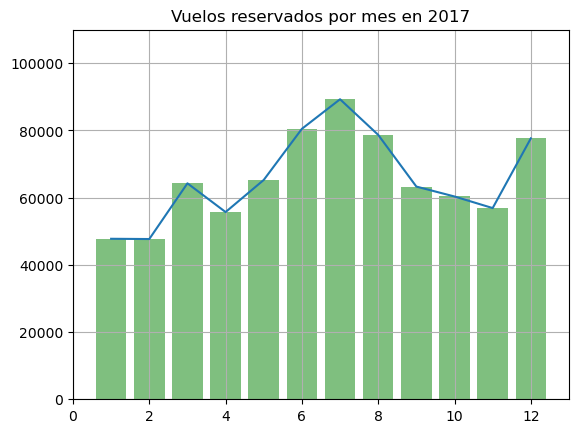

In [409]:
# --> 2017
# Usamos un gráfico tipo BARPLOT ya que la columna 'Month' la trataremos como una 
# columna categórica:
plt.bar(data=df_fb_17, 
        x= 'Month', 
        height= 'Flights Booked',
        color = 'green',
        alpha = 0.5)
# En este caso, el LINEPLOT también sería interesante, por lo que lo superponemos
# al gráfico anterior para ver más clara la fluctuación en el tiempo:
valores_tiempo = list(df_fb_17['Month'])
valores_reservas = list(df_fb_17['Flights Booked'])
sns.lineplot( x = valores_tiempo,
              y = valores_reservas) 
              
plt.title("Vuelos reservados por mes en 2017")
plt.grid()
plt.xlim(0,13)
plt.ylim(0, 110000);

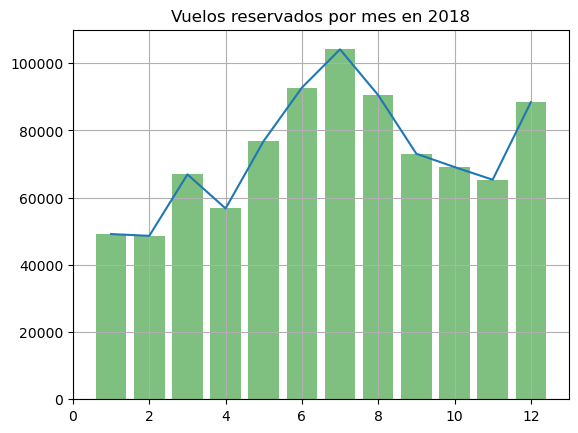

In [410]:
# --> 2018
# Usamos un gráfico tipo BARPLOT ya que la columna 'Month' la trataremos como una 
# columna categórica:
plt.bar(data=df_fb_18, 
        x= 'Month', 
        height= 'Flights Booked',
        color = 'green',
        alpha = 0.5)
# En este caso, el LINEPLOT también sería interesante, por lo que lo superponemos
# al gráfico anterior para ver más clara la fluctuación en el tiempo:
valores_tiempo = list(df_fb_18['Month'])
valores_reservas = list(df_fb_18['Flights Booked'])
sns.lineplot( x = valores_tiempo,
              y = valores_reservas)
plt.title("Vuelos reservados por mes en 2018")
plt.grid()
plt.xlim(0,13)
plt.ylim(0, 110000);

#### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

3. ¿Cuál es la distribución de los clientes por provincia o estado?

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

6. ¿Cómo se distribuyen los clientes según su estado civil y género?